# 2. Fundamentals

# 2.1 Data sets in use

### 2.1.1 Data sets used in this course - MTPL

We will (once again) use the Motor Third Party Liability data set. There are 163,231 policyholders in this data set.

The frequency of claiming ( nclaims ) and corresponding severity ( avg , the amount paid on average per claim reported by a
policyholder) are the target variables in this data set.

Predictor variables are:
* the exposure-to-risk, the duration of the insurance coverage (max. 1 year)
* factor variables, e.g. gender, coverage, fuel
* continuous, numeric variables, e.g. age of the policyholder, age of the car
* spatial information: postal code (in Belgium) of the municipality where the policyholder resides.  

More details in [Henckaerts et al. (2018, Scandinavian Actuarial Journal)](https://katrienantonio.github.io/projects/2019/06/13/machine-learning/#data-driven) and [Henckaerts et al. (2019, arxiv)](https://katrienantonio.github.io/projects/2019/06/13/machine-learning/#tree-based-pricing).

### 2.1.2 Data sets used in this course - MNIST

As discussed, not all data are in tabular format. We analyze an image database from the Modified National Institute of Standards and Technology, short MNIST.

Working with MNIST will learn us how machine learning methods can be used to work with new data sources, such as images.
* Large database of 70,000 labeled images of
handwritten digits, see
http://yann.lecun.com/exdb/mnist/
* Images are preprocessed, i.e. scaled and centered.
* Classic test case for machine learning classification
algorithms. Current models achieve an accuracy of
[more than 99.5%](https://en.wikipedia.org/wiki/MNIST_database).


The images are in grayscale. Each image is stored as a 28x28 intensity matrix, with intensity expressed on a scale from 0-255.
<img src="./imgs/mnist_1.png" width="300" height="300" align="center"/>

Recognizing that the images below all represent the digit 8 is trivial for humans, but difficult for computers.
<img src="./imgs/mnist_2.png" width="350" height="350" align="center"/>
Neural networks are ideal for situations where the relation between the input (here: intensity matrix) and the output (here: 0-9) is complicated.


In [35]:
import os
import random
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from IPython.display import clear_output
from tensorflow.keras.utils import plot_model
from keras import backend as K

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.keras.backend.set_session(session_conf)

seed = 123

def reset_random_seeds(seed):
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    
reset_random_seeds(seed)

In [37]:
#load mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [38]:
# validate dimension
print(f'x_train:{x_train.shape}, y_train:{y_train.shape}, x_test:{x_test.shape}, y_test:{y_test.shape}')

x_train:(60000, 28, 28), y_train:(60000,), x_test:(10000, 28, 28), y_test:(10000,)


In [39]:
# stop at the first matrix "in the dimension depth"
x_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

The image data (28x28) is flattened into a vector of length 784:

In [40]:
# reshape x_train(flatten the tensor as ANN takes vector data as input)
vec_x_train = tf.reshape(x_train, shape = [x_train.shape[0], x_train.shape[1]*x_train.shape[1]])
proto_tensor = tf.make_tensor_proto(vec_x_train)
arr_vec_x_train = tf.make_ndarray(proto_tensor)/255

In the following matrix, each row corresponds to one (flattened) image:

In [41]:
vec_x_train #tf.Tensor object

<tf.Tensor: id=34248, shape=(60000, 784), dtype=uint8, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)>

In [42]:
arr_vec_x_train #np.array object

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
# Image values in train_x vector have been normalized
print(f'min:{np.min(arr_vec_x_train)}, max:{np.max(arr_vec_x_train)}')

min:0.0, max:1.0


In [44]:
# reshape x_test(flatten the tensor as ANN takes vector data as input)
vec_x_test = tf.reshape(x_test, shape = [x_test.shape[0],x_test.shape[1]*x_test.shape[1]])
proto_tensor = tf.make_tensor_proto(vec_x_test)
arr_vec_x_test = tf.make_ndarray(proto_tensor)/255

In [45]:
vec_x_test #tf.Tensor object

<tf.Tensor: id=34251, shape=(10000, 784), dtype=uint8, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)>

In [46]:
arr_vec_x_test #np.array object

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
# image values in test_x vector have been normalized:
print(f'min:{np.min(arr_vec_x_test)}, max:{np.max(arr_vec_x_test)}')

min:0.0, max:1.0


We point out that we are dealing with a multi-class classification problem - elements must be classified in 10 categories:

In [48]:
# Unique elements in y_train and y_test vectors
print(f'unique y_train:{np.unique(y_train)}, unique y_test:{np.unique(y_test)}')

unique y_train:[0 1 2 3 4 5 6 7 8 9], unique y_test:[0 1 2 3 4 5 6 7 8 9]


We construct 10 dummy variables (0-9) for the output of the model:

In [49]:
# y_train
output = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [50]:
# y_test
test_output = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [51]:
# let's highlight the shape of the newly created np.array objects
print(f'shape of output:{output.shape}, shape of test_output:{test_output.shape}')

shape of output:(60000, 10), shape of test_output:(10000, 10)


We extract one row from the matrix arr_vec_x_train, we reshape it to (28x28) pixel format so that we can easily print it:

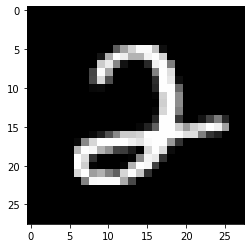

In [52]:
index = 16
pixels = arr_vec_x_train[index].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

### 2.2 De-mystifying neural networks

Different types of neural networks and their applications:
* ANN: Artificial Neural Network for regression and classification problems, with vectors as input data
* CNN: Convolutional Neural Network for image processing, image/face/... recognition, with images as input data
* RNN: Recurrent Neural Network for sequential data such as text or time series
* ...

De-mystify artificial neural networks (ANNs):
* a collection of inter-woven linear models
* extending linear approaches to detect non-linear interactions in high-dimensional data.
<img src="./imgs/nn_1.png" width="300" height="300" align="center"/>

Some terminology:
* $x$ is the input layer
* $v$ is the output layer middle layer is a hidden layer
* four neurons: $x, z_{1}, z_{2}$ and $v$.


First, we apply two independent linear models:
$$
\begin{align}
z_{1} = b_{1} + x\cdot w_{1}
\end{align}
$$
$$
\begin{align}
z_{2} = b_{2} + x\cdot w_{2}
\end{align}
$$
using four parameters: two intercepts and two slopes.

Next, we construct another linear model with the as inputs:
$$
\begin{align}
\hat{y} := v = b_{3} + z_{1}\cdot u_{1} + z_{2}\cdot u_{2}
\end{align}
$$

Putting it all together:
$$
\begin{align}
v = b_{3} + z_{1}\cdot u_{1} + z_{2}\cdot u_{2} \\
= b_{3} + (b_{1} + x\cdot w_{1})\cdot u_{1} + (b_{2} + x\cdot w_{2})\cdot u_{2} \\
= (b_{3} + u_{1}\cdot b_{1} + u_{2}\cdot b_{2})+(w_{1}\cdot u_{1} + w_{2}\cdot u_{2})\cdot x \\
= (intercept) + (slope)\cdot x.
\end{align}
$$

Model is over-parametrized, with infinitely many ways to describe the same model. Essentially, still a linear model!
<img src="./imgs/nn_2.png" width="400" height="400" align="center"/>

We capture non-linear relationships between and by replacing
$$
\begin{align}
v = b_{3} + z_{1}\cdot u_{1} + z_{2}\cdot u_{2}
\end{align}
$$
with
$$
\begin{align}
v = b_{3} + \sigma(z_{1})\cdot u_{1} + \sigma(z_{2})\cdot u_{2} \\
= b_{3} + \sigma(b_{1} + x\cdot w_{1})\cdot u_{1} + \sigma(b_{2} + x\cdot w_{2})\cdot u_{2}
\end{align}
$$

 $\sigma(\cdot)$ is an activation function, a mapping from $\mathbb{R}$ to $\mathbb{R}$. Adding an activation function greatly increases the set of possible relations between $v$ and $x$.

For example, the rectified linear unit (ReLU) activation function:
\begin{equation}
  D_{it} =
    \begin{cases}
      x, & \text{if x>0}\\
      0, & \text{otherwise.}\\
    \end{cases}       
\end{equation}
<img src="./imgs/nn_3.png" width="400" height="400" align="center"/>

### 2.2.1 From the simple neural network to ANNs

Artificial Neural networks (ANNs):
* a collection of neurons
* organized into an ordered set of layers
* directed connections pass signals between neurons in adjacent layers
*to train:
    * update parameters describing the connections by minimizing loss function over training data 
* to predict:
    * pass $x$ to first layer, output of final layer is \hat{y}.
The network is dense or densely connected if each neuron in a layer receives an input from all the neurons present in the previous layer.
</figure>
<figure>
<img src="./imgs/nn_4.png" alt="autoencoder_schema" style="width: 400px;"/>
<figcaption><center>This is a _feedforward_ neural network - no loops!<p></p></center></figcaption>
</figure>

### 2.2.2 From the simple neural network to ANNs

Using the neural nets terminology or language:
* intercept called the bias
* slopes called weights
* $L + 1$ layers in total, with input layer 0 denoted as layer 0 and output layer as $L$
* use $a$ (from activation) to denote the output of agiven neuron in a given layer
</figure>
<figure>
<img src="./imgs/nn_5.png" alt="autoencoder_schema" style="width: 400px;"/>
<figcaption><center>A single layer ANN, also called perceptron or artificial neuron.
<p></p></center></figcaption>
</figure>

### 2.3 Neural network architecture in Keras

In a neural network:
* input travels through a **sequence** of layers, and gets transformed into the output
* layers in-between the input layer and the output layer are called hidden layers
* _tf.keras.layer.Dense_ object deploys a fully connected layer in the neural network

This sequential layer structure is really at the core of the Keras libary. Tensorflow Sequential API is endowed will all the necessary tools for setting up neural networks. Keras and TensorFlow 2.0 provide you with three methods to implement your own neural network architectures:
* Sequential API
* Functional API
* Model subclassing
<img src="./imgs/nn_6.png" width="400" height="400" align="center"/>

Note that:

```python
model.add(tf.keras.layers.Dense(units = 16,
                                activation = 'sigmoid',
                                input_shape = (784,)))  Sequential model
```
* **units = 16**: number of nodes in the given layer
* **activation = 'sigmoid'**: this hidden layer uses the sigmoid activation function.
* **input_shape = (784,)**:
    * tells the first hidden layer how many input features there are
    * only required for the first tf.keras.layers.Dense instantiation in a Sequential model
    * differently from R, it must be specified as array and not as integer (even if one-dimensional)

In [161]:
reset_random_seeds(seed)
# instantiate model object
model = tf.keras.models.Sequential()

In [162]:
# neural network structure - adding first layer (Dense-type, fully connected)
model.add(tf.keras.layers.Dense(units = 16,
                                activation = 'sigmoid', 
                                input_shape = (784,)))

In [163]:
# neural networdk structure - adding output layer (Dense-type, fully connected)
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax')) # activation function depends on the type of prediction

In [164]:
# compiling the model
model.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [165]:
# model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


The module ```from tensorflow.keras.utils import plot_model``` provides visualization tools for the neural network structure

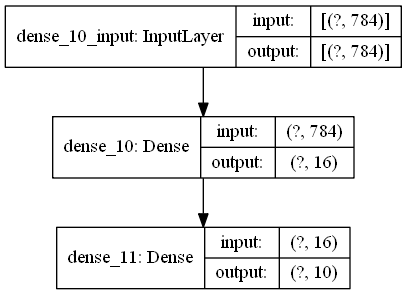

In [166]:
# model structure
tf.keras.utils.plot_model(model=model, show_shapes=True, to_file='./imgs/model.png')

Note that fit(.) tunes the model parameters (the weights and bias terms), we use fit() to start executing model training.

```python
model.fit(x = arr_vec_x_train, 
          y = output, 
          batch_size = 128, 
          epochs = 10, 
          validation_split = 0.2)
```
* **x = arr_vec_x_train**: wa train the images contained in arr_vec_x_train and their corresponding labels **y = output**
* **batch_size = 128**: Parameter updates are calculated based on small subsets of the training data with batch_size elements
* **epochs = 10**: An epoch is one iteration of the algorithm over the full dataset.
* **validation_split = 0.2**:we use the last 20% ofour input training data as a hold-out validation set. We evaluate the loss on this validation set at the end of each epoch.


In [167]:
# fit the model
model.fit(arr_vec_x_train, 
          output, 
          batch_size = 128, 
          epochs = 10, 
          validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 23us/sample - loss: 1.2724 - accuracy: 0.7501 - val_loss: 0.7536 - val_accuracy: 0.8697
Epoch 2/10
48000/48000 [==============================] - 1s 14us/sample - loss: 0.5972 - accuracy: 0.8779 - val_loss: 0.4489 - val_accuracy: 0.8971
Epoch 3/10
48000/48000 [==============================] - 1s 15us/sample - loss: 0.4143 - accuracy: 0.8976 - val_loss: 0.3529 - val_accuracy: 0.9095
Epoch 4/10
48000/48000 [==============================] - 1s 14us/sample - loss: 0.3453 - accuracy: 0.9096 - val_loss: 0.3108 - val_accuracy: 0.9154
Epoch 5/10
48000/48000 [==============================] - 1s 14us/sample - loss: 0.3089 - accuracy: 0.9155 - val_loss: 0.2862 - val_accuracy: 0.9212
Epoch 6/10
48000/48000 [==============================] - 1s 14us/sample - loss: 0.2853 - accuracy: 0.9209 - val_loss: 0.2708 - val_accuracy: 0.9242
Epoch 7/10
48000/48000 [==============================] 

# 2.3 Model evaluation

evaluate(.) calculates losses and metrics on the test dataset:

In [168]:
# evaluate model
test_loss, test_accuracy = model.evaluate(arr_vec_x_test, test_output, verbose = 0)
print(f'loss:{test_loss}, accuracy:{test_accuracy}')

loss:0.23416787028312683, accuracy:0.9333000183105469


In [169]:
# prediction
prediction = np.round(model.predict(arr_vec_x_test),3)

In [170]:
prediction[0] # first row

array([0.   , 0.   , 0.001, 0.002, 0.   , 0.   , 0.   , 0.996, 0.   ,
       0.001], dtype=float32)

We need to map the highest score to the referring category. Afterwards, we extract the mist-predicted categories:

In [171]:
# prediction vs actual
predicted_category = np.argmax(prediction, axis = 1)
actual_category = np.argmax(test_output, axis = 1)

In [172]:
summary = pd.DataFrame({'pred_category':predicted_category,
                        'actual_category':actual_category,
                        'correct_classification':np.equal(predicted_category,actual_category)}); summary.head()

,pred_category,actual_category,correct_classification
0,7,7,True
1,2,2,True
2,1,1,True
3,0,0,True
4,4,4,True


In [173]:
# mis-predicted count
(~summary.correct_classification).sum()

666

Let's plot the mispredicted values:

In [174]:
# let's retrieve the index of mispredicted values from summary
idx = summary[(~summary.correct_classification)].index

In [175]:
def plot_img(vector_picture, wrong, actual_v, predited_v):
    pixels = vector_picture.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.title(f'actual:{actual_category[wrong]}, predicted:{predicted_category[wrong]}')
    plt.show()

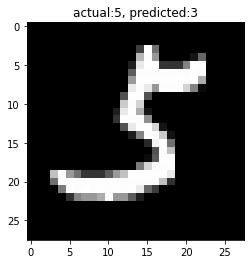

In [176]:
# example of mis-predicted values
wrong = idx[623]
ex = arr_vec_x_test[wrong]
plot_img(ex, wrong, actual_category, predicted_category)

In [152]:
prediction[np.arange(prediction.shape[0]), actual_category]

array([0.996, 0.978, 0.986, ..., 0.956, 0.967, 0.995], dtype=float32)

# 2.5 Your turn!

You will now design, compile and fit your own neural network for the MNIST dataset.

As a form of paralellized model selection, all of us will play with different model parameters. This way we gain insight into which parameter values work well for this dataset.

Base model: the neural network with a single hidden layer, as specified in the R script.

Try some of the following ideas to improve the model:
* add hidden layers: the number of nodes in subsequent layers should decrease
* change batch size
* change the activation function.


**Example 1:** deploying a _tf.keras.layers.GaussianNoise_ between the 2 fully-connected hiddel layers causes a drop in the accuracy of the model

In [233]:
reset_random_seeds(seed)

# instantiate model object
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 16,
                                activation = 'sigmoid', 
                                input_shape = (784,)))
model.add(tf.keras.layers.GaussianNoise(stddev = 4)) # std = 4
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(arr_vec_x_train, 
          output, 
          batch_size = 128, 
          epochs = 10, 
          validation_split = 0.2,
          verbose = 0)

# evaluate model
test_loss, test_accuracy = model.evaluate(arr_vec_x_test, test_output, verbose = 0)
print(f'loss:{test_loss}, accuracy:{test_accuracy}')

loss:1.7123504894256592, accuracy:0.8586999773979187


In [234]:
# prediction vs actual
prediction = np.round(model.predict(arr_vec_x_test),3)
predicted_category = np.argmax(prediction, axis = 1)
actual_category = np.argmax(test_output, axis = 1)
summary = pd.DataFrame({'pred_category':predicted_category,
                        'actual_category':actual_category,
                        'correct_classification':np.equal(predicted_category,actual_category)}); summary.head()

,pred_category,actual_category,correct_classification
0,7,7,True
1,2,2,True
2,1,1,True
3,0,0,True
4,4,4,True


In [235]:
# count of mis-predicted categories
(~summary.correct_classification).sum()

1410

# 2.6 Dealing with overfitting

Several methods proposed to reduce overfitting:
* try different weight initializations
* early stopping
    *calculate validation performance after each epoch
    *stop when this no longer improves
* regularization (cfr. lasso and {glmnet}): e.g.
    * $\min\limits_{w,b}\mathcal{L}(w,b) + \frac{\lambda}{2}\cdot||w||^{2}_{2}$
* dropout
    * randomly set activations to zero, with fixed $p$ 
    * probability both in forward propagation as well as backpropagation
    * only in training, all nodes turned on during prediction.
    
Example code:
```python
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 16,
                                activation = 'sigmoid', 
                                input_shape = (784,),
                                kernel_regularizer = tf.keras.regularizers.l1(0.01)))
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
```